
### 1. Загрузка и предобработка данных 
Загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа. Убедимся, что тип данных в каждой колонке — правильный.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
import numpy as np
visits = pd.read_csv('visits_log.csv')
visits.info()
display(visits.head())
visits.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358532 entries, 0 to 358531
Data columns (total 5 columns):
Uid          358532 non-null uint64
Device       358532 non-null object
End Ts       358532 non-null object
Source Id    358532 non-null int64
Start Ts     358532 non-null object
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Uid,Device,End Ts,Source Id,Start Ts
0,16879256277535980062,touch,20.12.2017 17:38,4,20.12.2017 17:20
1,104060357244891740,desktop,19.02.2018 17:21,2,19.02.2018 16:53
2,7459035603376831527,touch,01.07.2017 1:54,5,01.07.2017 1:54
3,16174680259334210214,desktop,20.05.2018 11:23,9,20.05.2018 10:59
4,9969694820036681168,desktop,27.12.2017 14:06,3,27.12.2017 14:06


0

В данных нет пропусков и дубликатов.  
Но в названиях колонок присутствуют буквы верхнего регистра и пробелы - это неудобно. Приведем все к нижнему регистру и заменим пробел на подчеркивание.  
Формат данных в колонках с временем начала и окончания сессии - текстовый. Переведем в формат даты-времени.

In [2]:
visits.columns = visits.columns.str.lower()
visits = visits.rename(columns={'source id':'source_id', 'end ts': 'end_ts', 'start ts': 'start_ts'})
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format='%d.%m.%Y %H:%M') 
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format='%d.%m.%Y %H:%M') 
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358532 entries, 0 to 358531
Data columns (total 5 columns):
uid          358532 non-null uint64
device       358532 non-null object
end_ts       358532 non-null datetime64[ns]
source_id    358532 non-null int64
start_ts     358532 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


,uid,device,end_ts,source_id,start_ts
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00
2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00


In [3]:
visits['device'].value_counts()

desktop    261913
touch       96619
Name: device, dtype: int64

Получается, у нас есть всего два типа используемых устройств: настольный компьютер и планшет. Первый используется гораздо чаще в имеющемся наборе данных.

In [4]:
visits['source_id'].value_counts()

4     101653
3      85448
5      66711
2      47473
1      33943
9      13257
10     10005
7         36
6          6
Name: source_id, dtype: int64

И у нас 9 источников трафика. На первый взгляд, самыми популярными являются 4, 3 и 5, но лучше проверим это дальнейшими расчетами. Источниками 6 и 7 можно пренебречь из-за очень маленького количества переходов на сайт по ним.

In [5]:
orders = pd.read_csv('orders_log.csv')
orders.info()
display(orders.head())
orders.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


0

В данных нет пропусков и дубликатов.  
Но в названиях колонок присутствуют буквы верхнего регистра и пробелы - это неудобно. Приведем все к нижнему регистру и заменим пробел на подчеркивание.  
Формат данных в колонке с временем покупки - текстовый. Переведем в формат даты-времени.

In [6]:
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns={'buy ts':'buy_ts'})
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format='%Y.%m.%d %H:%M:%S')  
orders.info()
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [7]:
costs = pd.read_csv('costs.csv')
costs.info()
display(costs.head())
costs.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


0

В данных нет пропусков и дубликатов. 

In [8]:
costs['source_id'].value_counts()

5     364
9     363
3     363
1     363
10    363
4     363
2     363
Name: source_id, dtype: int64

Рекламных источников в затратах меньше, чем в таблице visits.   
Формат данных в колонке с датой затрат - текстовый. Переведем в формат даты.

In [9]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()
display(costs.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


### 2. Построение отчётов и расчет метрик  
В рамках анализа необходимо ответить на следующие вопросы:  
Продукт  
* 		Сколько людей пользуются в день, неделю, месяц? (DAU, WAU, MAU)
* 		Сколько сессий в день?
* 		Сколько длится одна сессия?
* 		Как часто люди возвращаются? (Retention Rate)  

Продажи  
* 		Когда люди начинают покупать?
* 		Сколько раз покупают за период?
* 		Какой средний чек?
* 		Сколько денег приносят? (LTV)  

Маркетинг  
* 		Сколько денег потратили? Всего / на каждый источник / по времени
* 		Сколько стоило привлечение одного покупателя из каждого источника?
* 		На сколько окупились расходы? (ROI)  


In [10]:
visits['date_ts'] = visits['start_ts'].dt.date
visits['week_ts'] = visits['start_ts'].dt.week
visits['month_ts'] = visits['start_ts'].dt.month
visits['year_ts'] = visits['start_ts'].dt.year
visits['weekday_ts'] = visits['start_ts'].dt.weekday
visits.head()

,uid,device,end_ts,source_id,start_ts,date_ts,week_ts,month_ts,year_ts,weekday_ts
0,16879256277535980062,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,2017-12-20,51,12,2017,2
1,104060357244891740,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,2018-02-19,8,2,2018,0
2,7459035603376831527,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,2017-07-01,26,7,2017,5
3,16174680259334210214,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,2018-05-20,20,5,2018,6
4,9969694820036681168,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,2017-12-27,52,12,2017,2


Посчитаем среднее количество пользователей в день. Посмотрим на общее количество пользователей, а также с разбивкой по устройствам.

uid    907.991758
dtype: float64

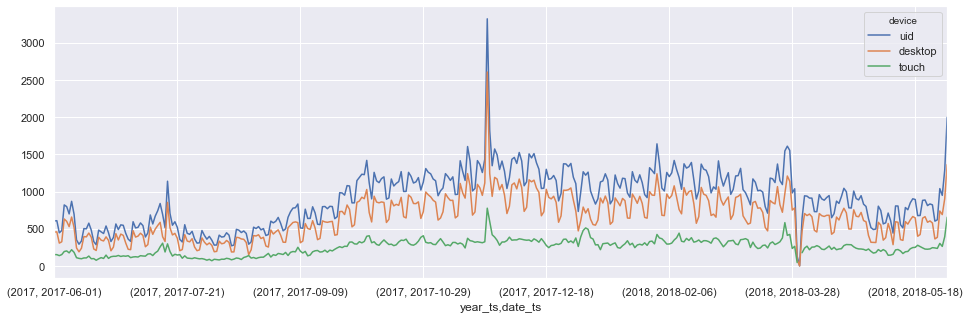

In [11]:
def users_graphs(period):
    fig, ax = plt.subplots(figsize = (16,5))
    visits.groupby(['year_ts', period]).agg({'uid': 'nunique'})\
            .plot(kind = 'line', ax = ax)
    visits.pivot_table(index = ['year_ts', period], columns = 'device', values = 'uid', aggfunc = 'nunique')\
            .plot(kind = 'line', ax = ax)
    display(visits.groupby(['year_ts', period]).agg({'uid': 'nunique'}).mean())
users_graphs('date_ts')

Среднее количество посетителей в день = 908. На сайт чаще заходят с десктопа, чем с планшета. С октября по апрель люди чаще пользовались сайтом, чем в другие месяцы - возможно это связано с сезонностью, для подтверждения этого предположения нужны данные за аналогичный период хотя бы еще одного года. Также на графике заметны периодические перепады активности внутри месяца, в первую очередь для пользователей десктопов, возможно существует разница в активности в зависимости от дня недели. Посмотрим на это подробнее:


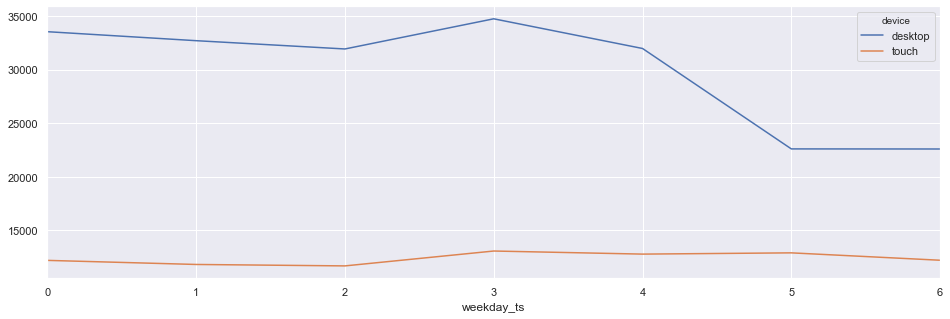

In [12]:
fig, ax = plt.subplots(figsize = (16,5))
visits.pivot_table(index = 'weekday_ts', columns = 'device', values = 'uid', aggfunc = 'nunique')\
        .plot(kind = 'line', ax = ax)

Да, действительно для пользователей стационарных компьютеров характерно снижение активности в выходные в 2 раза, по сравнению с буднями. (Вероятно, в выходные пользователи меньше сидят за компьютером.)У пользователей планшетов такого поведения не наблюдается.
Теперь посмотрим на количество ежедневных пользователей с разбивкой по источникам рекламы.

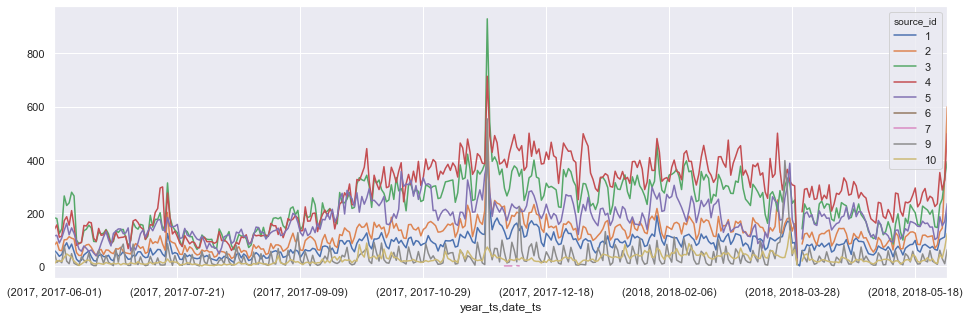

In [13]:
def users_ad_source(period):
    fig, ax = plt.subplots(figsize = (16,5))
    visits.pivot_table(index = ['year_ts', period], columns = 'source_id', values = 'uid', aggfunc = 'nunique')\
            .plot(kind = 'line', ax = ax)
users_ad_source('date_ts')

Среди рекламных источников по привлечению пользователей явно лидируют 4, 3 и 5-й.

Посмотрим на разбивку пользовательской активности по неделям.

uid    5716.245283
dtype: float64

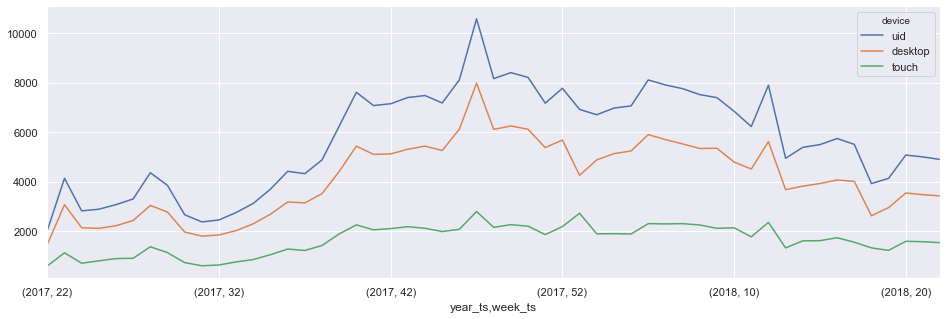

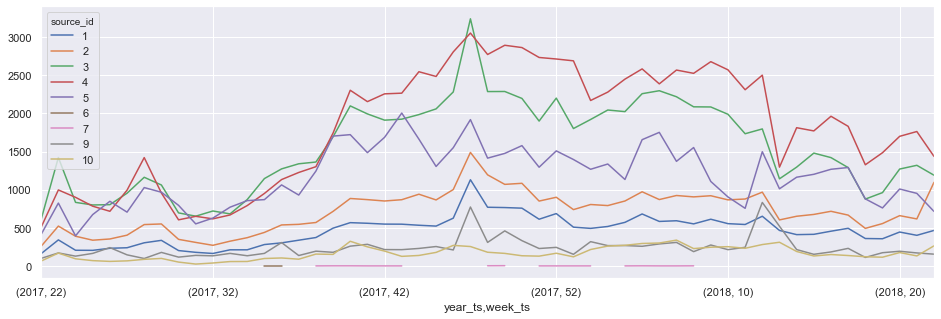

In [14]:
users_graphs('week_ts')
users_ad_source('week_ts')

Среднее количество посетителей в неделю = 5716. На этих графиках легче заметить некоторые пики активности. Они совпадают на графике количества посетителей и источников рекламы. То есть реклама в эти даты привлекала больше посетителей на сайт.

uid    23228.416667
dtype: float64

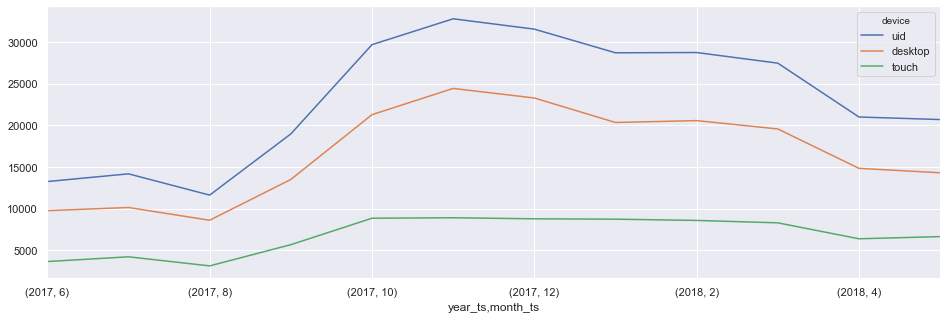

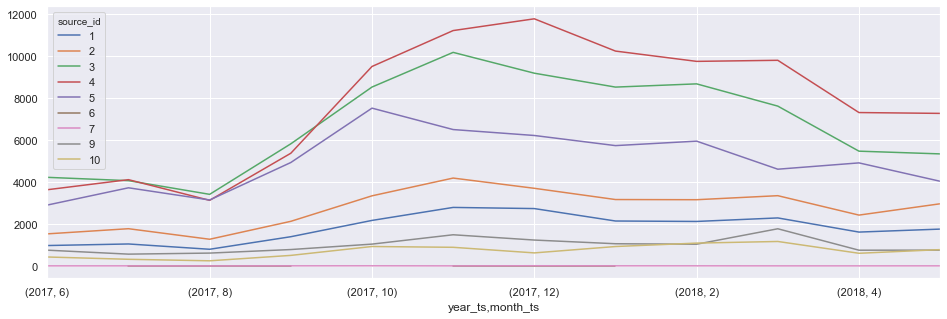

In [15]:
users_graphs('month_ts')
users_ad_source('month_ts')

Среднее количество посетителей в месяц = 23228. В графиках по месяцам легче наблюдать вероятную сезонность спроса, чем в графике по дням. А также на графике с источниками рекламы нагляднее выделяются 3,4 и 5-й источники, которые начинают свой рост с августа 2017, и уже с сентября-октября 4-й выбивается в лидеры, а 5-й немного сдает позиции, но продолжает удерживать 3-е место до конца наблюдаемого периода.  

Теперь посмотрим на среднее количество сессий в день:

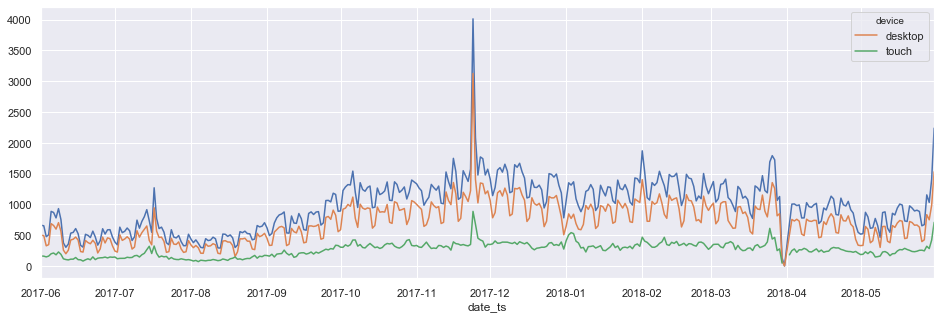

In [16]:
fig, ax = plt.subplots(figsize = (16,5))
visits.groupby('date_ts')['start_ts'].count()\
        .plot(kind = 'line', ax = ax)
visits.pivot_table(index = ('date_ts'), columns = 'device', values = 'start_ts', aggfunc = 'count')\
        .plot(kind = 'line', ax = ax)

In [17]:
visits.groupby(['year_ts', 'month_ts'])['start_ts'].count().mean()

29877.666666666668

График по форме повторяет график ежедневного числа пользователей. Если ориентироваться на более свежие данные на графике, то можно сказать, что с января по апрель 2018 среднее количество сессий в день было в районе 1000-1500 (около 900 с десктопов и 400 с планшетов), а затем снизилось до 500-1000 (700 с десктопов и 250 с планшетов).
В разрезе на одного пользователя получается:


In [18]:
display(visits.groupby(['year_ts', 'month_ts', 'uid'])['start_ts'].count().mean())

1.2862549822236413

In [19]:
by_device = visits.pivot_table(index = ['year_ts', 'month_ts', 'uid'], \
                               columns = 'device', values = 'start_ts', aggfunc = 'count')
by_device.mean()

device
desktop    1.305037
touch      1.179690
dtype: float64

чуть больше одной сессии в месяц. C разбивкой по устройствам картина не сильно меняется: с десктопов заходят чаще, но в среднем, все равно не сильно чаще одного раза в месяц.


In [20]:
by_ad_source = visits.pivot_table(index = ['year_ts', 'month_ts', 'uid'], \
                               columns = 'source_id', values = 'start_ts', aggfunc = 'count')
by_ad_source.mean()

source_id
1     1.555377
2     1.438576
3     1.053769
4     1.091013
5     1.107972
6     1.000000
7     1.058824
9     1.120152
10    1.179557
dtype: float64

Частота посещений с разбивкой по источникам сильно отличается для источников 1 и 2 по сравнению со всеми остальными. Из этих источников гораздо чаще переходят на сайт, чем из остальных.

И посчитаем среднюю длительность сессии:

In [21]:
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
visits['session_duration'].mean()

645.0184083986925

In [22]:
visits.groupby('device')['session_duration'].mean()

device
desktop    705.657298
touch      480.639626
Name: session_duration, dtype: float64

В среднем получаем около 10-11 минут. Выглядит так, как будто пользователи не долго выбирают, куда им пойти в выходные...
Если смотреть с разбивкой по источникам, то средняя продолжительность сессии на стационарном компьютере дольше (12мин), чем на планшете (8 мин).


In [23]:
visits.groupby('source_id')['session_duration'].mean()

source_id
1     1044.712017
2      847.378510
3      574.334566
4      560.591227
5      528.218735
6     1370.000000
7      606.666667
9      573.378592
10     663.730135
Name: session_duration, dtype: float64

По длительности лидируют 6, 1 и 2-й рекламные источники. Как уже было отмечено ранее, 6-м источником можно пренебречь из-за очень малого количества данных по нему, поэтому в лидерах по длительности сессий остаются 1 и 2 источники (17 и 14 минут соответственно).

Теперь посмотрим, как часто люди возвращаются на сайт.

In [24]:
# сначала необходимо сформировать когорты. В нашем случае, это будут помесячные группировки
first_visit_date = visits.groupby(['uid'])['start_ts'].min()
first_visit_date.name = 'first_visit_date'
visits = visits.join(first_visit_date,on='uid')

In [25]:
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]').dt.strftime('%Y-%m')

In [26]:
# теперь расчитаем показатель продолжительности активности когорты - порядковый номер месяца от начала активности
visits['cohort_lifetime'] = (visits['start_ts'] - visits['first_visit_date']) / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype(int)

In [27]:
cohorts = visits.groupby(['first_visit_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count,on='first_visit_month')
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
cohorts.head(5)

,first_visit_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06,0,13259,13259,1.000000
1,2017-06,1,986,13259,0.074365
2,2017-06,2,710,13259,0.053549
3,2017-06,3,813,13259,0.061317
4,2017-06,4,921,13259,0.069462


(12.0, 0.0)

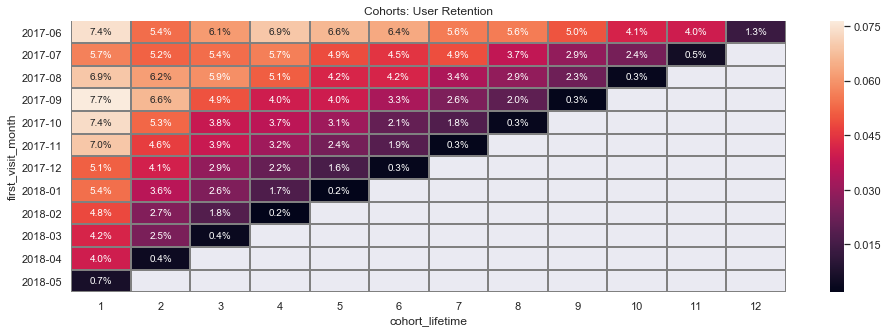

In [28]:
retention_pivot = cohorts.query('cohort_lifetime > 0')\
                         .pivot_table(index='first_visit_month',columns='cohort_lifetime',\
                                      values='retention',aggfunc='sum')
plt.figure(figsize=(16, 5))
plt.title('Cohorts: User Retention')
ax = sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [29]:
#выберем пользователей, пришедших на сайт первый раз до 2018 года, т.к. те, кто пришел позже,
# еще не успел накопить историю удержания в 6 месяцев и больше.
cohorts = visits.query('first_visit_date < "2018-01-01"')\
                .groupby(['device','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['device','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count,on='device')
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

(2.0, 0.0)

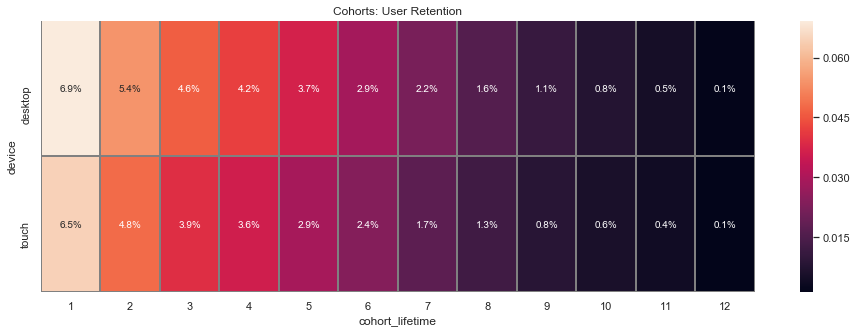

In [30]:
retention_pivot = cohorts.query('cohort_lifetime > 0')\
                         .pivot_table(index='device',columns='cohort_lifetime',\
                                      values='retention',aggfunc='sum')
plt.figure(figsize=(16, 5))
plt.title('Cohorts: User Retention')
ax = sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Пользователи стационарных компьютеров возвращаются на сайт чаще, чем пользователи планшетов, но разница очень незначительная, и в совокупности с очень низким общим показателем удержания вряд ли имеет большое значение.
Теперь посмотрим на коэффицент удержания в разрезе рекламных источников.

In [31]:
cohorts = visits.query('first_visit_date < "2018-01-01"')\
                .groupby(['source_id','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['source_id','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count,on='source_id')
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

(7.0, 0.0)

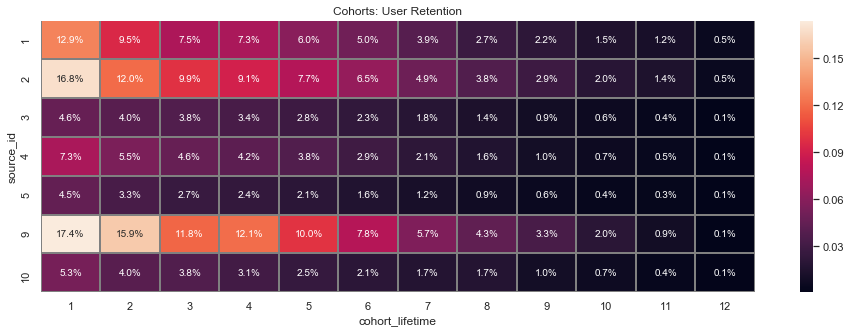

In [32]:
retention_pivot = cohorts.query('cohort_lifetime > 0 and source_id != 6 and source_id != 7')\
                         .pivot_table(index='source_id',columns='cohort_lifetime',\
                                      values='retention',aggfunc='sum')
plt.figure(figsize=(16, 5))
plt.title('Cohorts: User Retention')
ax = sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Источники 1,2 и 9 являются лидерами по удержанию пользователей.

Теперь посмотрим, сколько времени проходит от момента первой сессии до первой покупки.

In [33]:
first_buy_date = orders.groupby(['uid'])['buy_ts'].min()
first_buy_date.name = 'first_buy_date'

In [34]:
user_profile = visits.sort_values(by = ['uid', 'start_ts'])\
               .groupby('uid')\
               .agg({'start_ts' : 'first', 'source_id': 'first', 'device': 'first'})\
               .rename(columns = {'start_ts' : 'first_visit_date'})

In [35]:
time_to_buy = pd.merge(first_buy_date, user_profile, how = 'left', on='uid')

In [36]:
time_to_buy['purchase_time'] = (time_to_buy['first_buy_date'] - time_to_buy['first_visit_date'])\
                                / np.timedelta64(1,'m')
display(time_to_buy.head())
time_to_buy['purchase_time'].describe()

,first_buy_date,first_visit_date,source_id,device,purchase_time
uid,,,,,
313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,2,desktop,154022.0
1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,10,touch,0.0
2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,3,desktop,79.0
2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,5,desktop,1184.0
2551852515556206,2017-11-24 10:14:00,2017-11-24 11:22:00,5,desktop,-68.0


count     36523.000000
mean      24335.595543
std       67786.435390
min       -1381.000000
25%           4.000000
50%          16.000000
75%        2897.000000
max      523144.000000
Name: purchase_time, dtype: float64

In [37]:
time_to_buy['purchase_time'].mode()

0    1.0
dtype: float64

Среди данных о времени покупки оказались отрицательные значения. Возможно, это какая-то ошибка сбора данных... Посмотрим, сколько таких строк:

In [38]:
time_to_buy.query('purchase_time < 0').count()

first_buy_date      868
first_visit_date    868
source_id           868
device              868
purchase_time       868
dtype: int64

Получили 868, около 2,4%. Немного. Они не должны повлиять на наши расчеты. Из описания данных о времени покупки также видим, что мода равна 1 минуте, 50% значений меньше 16 минут, хотя среднее значение выборки составляет 16,8 дней, что говорит о наличии больших выбросов в данных. Посторим график для большей наглядности.

[(0, 1000)]

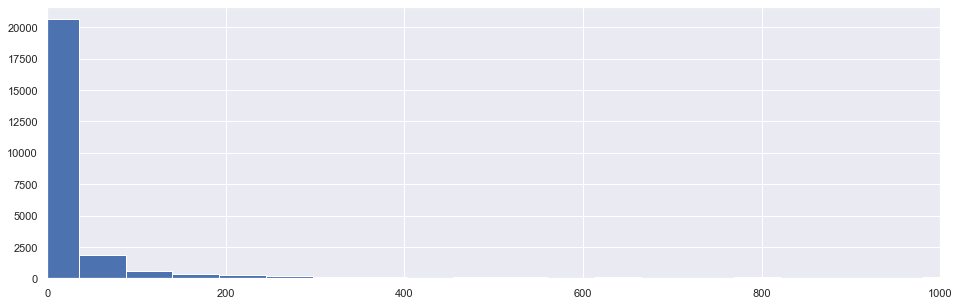

In [39]:
fig, ax = plt.subplots(figsize = (16,5))
time_to_buy['purchase_time'].hist(bins = 10000, ax = ax)
ax.set(xlim=(0,1000))

Получаем, что подавляющее большинство первых покупок происходит в течение первого получаса после первого захода на сайт.

Перейдем к изучению частоты покупок.

In [40]:
purchases = pd.merge(orders, user_profile, how = 'left', on='uid')

In [41]:
purchases['purch_month'] = purchases['buy_ts'].dt.month
purchases['purch_year'] = purchases['buy_ts'].dt.year

In [42]:
display(purchases.pivot_table(index = ['purch_year', 'purch_month'], values = 'uid', aggfunc = 'nunique').mean())
display(purchases.pivot_table(index = ['purch_year', 'purch_month'], values = 'buy_ts', aggfunc = 'count').mean())
purchases.pivot_table(index = ['purch_year', 'purch_month', 'uid'], values = 'buy_ts', aggfunc = 'count').mean()

purch_month       1.000000
purch_year        1.000000
uid            3155.307692
dtype: float64

buy_ts    3878.076923
dtype: float64

buy_ts    1.229065
dtype: float64

Получаем в среднем 3155 покупателей в месяц, совершающих в среднем 3878 транзакций. То есть, чуть больше 1 покупки на 1 покупающего в месяц. В среднем 3878 покупок на 29878 посещений. Посмотрим на помесячное соотношение посещений и покупок на графике ниже:

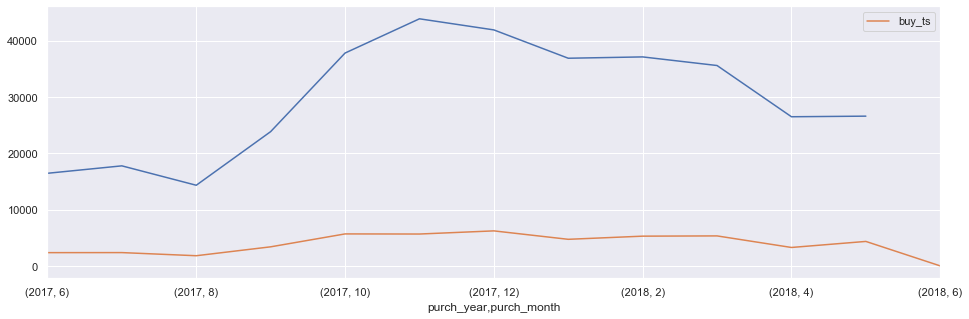

In [43]:
fig, ax = plt.subplots(figsize = (16,5))
visits.groupby(['year_ts', 'month_ts'])['start_ts'].count()\
         .plot(kind = 'line', ax = ax)
purchases.pivot_table(index = ['purch_year', 'purch_month'], values = 'buy_ts', aggfunc = 'count')\
         .plot(kind = 'line', ax = ax)

На первый взгляд кажется, что существенный рост посещаемости сайта, начиная с августа 2017, не привел к соответствующему росту количества покупок. Обратимся к расчетам для более точной картины.

In [44]:
monthly_visits = visits.groupby(['year_ts', 'month_ts'])['start_ts'].count()
monthly_visits.name = 'monthly_visits'
monthly_purchases = purchases.pivot_table(index = ['purch_year', 'purch_month'], \
                                          values = 'buy_ts', aggfunc = 'count').reset_index()
monthly_conversion = pd.merge(monthly_visits, monthly_purchases, how = 'left', \
                              left_on = ['year_ts', 'month_ts'], \
                              right_on = ['purch_year', 'purch_month'])

In [45]:
monthly_conversion['cr'] = monthly_conversion['buy_ts'] / monthly_conversion['monthly_visits']

Посмотрим на процент конверсии по месяцам:

In [46]:
display(monthly_conversion.style.format({'cr': "{:.1%}"}))

,monthly_visits,purch_year,purch_month,buy_ts,cr
0,16443,2017,6,2354,14.3%
1,17763,2017,7,2363,13.3%
2,14318,2017,8,1807,12.6%
3,23839,2017,9,3387,14.2%
4,37789,2017,10,5679,15.0%
5,43868,2017,11,5659,12.9%
6,41898,2017,12,6218,14.8%
7,36868,2018,1,4721,12.8%
8,37104,2018,2,5281,14.2%
9,35576,2018,3,5326,15.0%


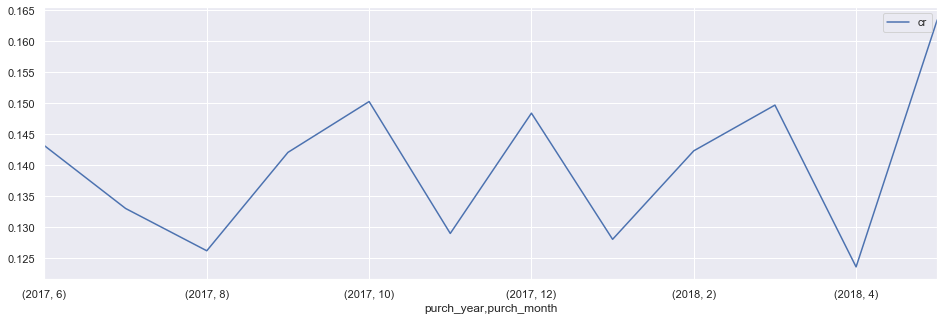

In [47]:
fig, ax = plt.subplots(figsize = (16,5))
monthly_conversion.pivot_table(index = ['purch_year', 'purch_month'], values = 'cr')\
                .plot(kind = 'line', ax = ax)

С течением времени не наблюдается тенденции роста конверсии.
Посмотрим на количество покупок в разрезе рекламных источников.

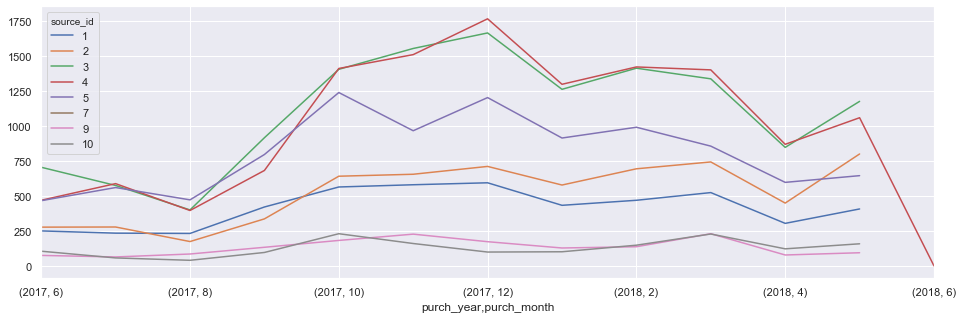

In [48]:
fig, ax = plt.subplots(figsize = (16,5))
purchases.pivot_table(index = ['purch_year', 'purch_month'], columns = ['source_id'], \
                      values = 'buy_ts', aggfunc = 'count')\
         .plot(kind = 'line', ax = ax)

Здесь лидируют 3 и 4-й источники, аналогично количеству посещений.

Теперь посчитаем средний чек.

5.866513626792354

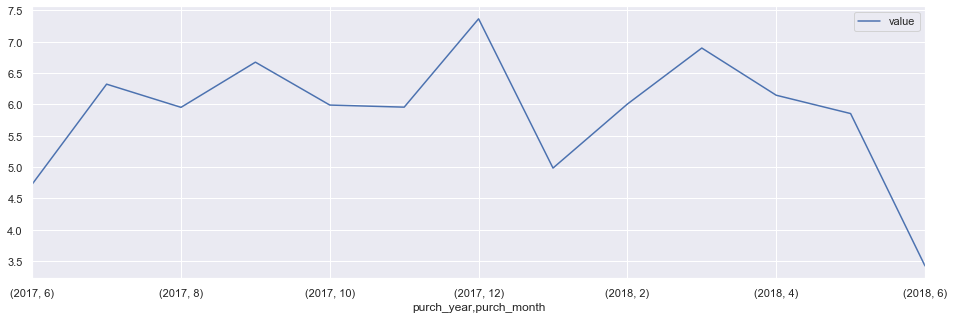

In [49]:
fig, ax = plt.subplots(figsize = (16,5))
ave_purch_amount = purchases.pivot_table(index = ['purch_year', 'purch_month'],\
                              values = ['revenue','uid'], aggfunc = {'uid': 'nunique', 'revenue':'sum'})
ave_purch_amount['value'] = ave_purch_amount['revenue'] / ave_purch_amount['uid']
display(ave_purch_amount['value'].mean())
ave_purch_amount.plot(kind = 'line', y = 'value', ax = ax)

Средний чек составляет 5,9 у.е. С течением времени не наблюдается устойчивой тенденции к его росту или падению.

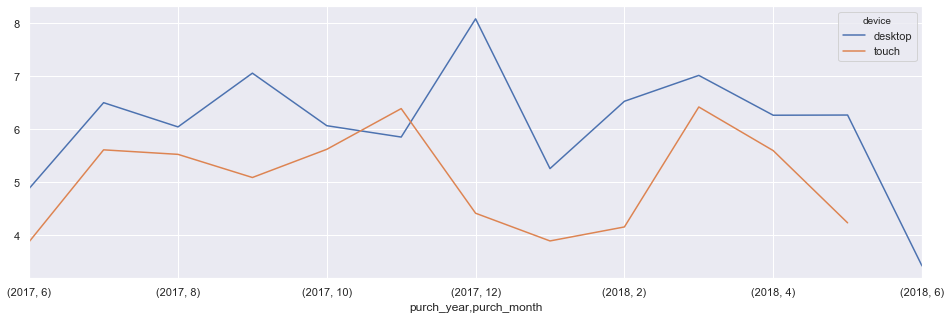

In [50]:
fig, ax = plt.subplots(figsize = (16,5))
ave_purch_amount = purchases.pivot_table(index = ['purch_year', 'purch_month','device'], \
                              values = ['revenue','uid'], aggfunc = {'uid': 'nunique', 'revenue':'sum'})
ave_purch_amount['value'] = ave_purch_amount['revenue'] / ave_purch_amount['uid']
ave_purch_amount.pivot_table(index = ['purch_year', 'purch_month'], columns = 'device', values = 'value')\
                .plot(kind = 'line', ax = ax)

С разбивкой по устройствам - пользователи, пришедшие с настольных компьютеров, в среднем приносят больше денег с одной покупки, чем пользователи планшетов. Интересным исключением выступает ноябрь 2017, когда ситуация была обратной.

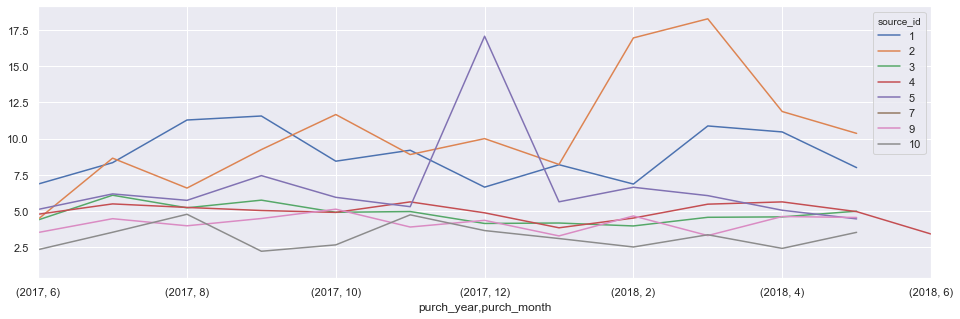

In [51]:
fig, ax = plt.subplots(figsize = (16,5))
ave_purch_amount = purchases.pivot_table(index = ['purch_year', 'purch_month','source_id'], \
                              values = ['revenue','uid'], aggfunc = {'uid': 'nunique', 'revenue':'sum'})
ave_purch_amount['value'] = ave_purch_amount['revenue'] / ave_purch_amount['uid']
ave_purch_amount.pivot_table(index = ['purch_year', 'purch_month'], columns = 'source_id', values = 'value')\
                .plot(kind = 'line', ax = ax)

В разрезе устройств наблюдается следующая картина: средний чек пользователей, пришедших по рекламным источникам 1 и 2 выше по сравнению со всеми остальными источниками, за исключением одного месяца - декабря 2017, когда средний чек пришедших по 5ому рекламному источнику достиг пика (17у.е.). Также интересно отметить, что в феврале-марте 2018 средний чек (17-18у.е.) пришедших по 2-ому рекламному источнику был существенно выше всех остальных.

Для того, чтобы посчитать, сколько денег приносят нам клиенты, необходимо помимо выручки знать среднюю маржинальность продаж, однако мы не обладаем данной информацией, поэтому обратимся к расчетам по выручке.


In [52]:
purchases = purchases.join(first_buy_date,on='uid')
purchases['first_purchase_month'] = purchases['first_buy_date'].astype('datetime64[M]')
purchases['purch_month'] = purchases['buy_ts'].astype('datetime64[M]')

In [53]:
purchases['cohort_lifetime'] = (purchases['purch_month'] - purchases['first_purchase_month'])\
                                / np.timedelta64(1, 'M')
purchases['cohort_lifetime'] = purchases['cohort_lifetime'].round().astype('int')
purchases['first_purchase_month'] = purchases['first_purchase_month'].astype('datetime64[M]').dt.strftime('%Y-%m')

In [54]:
cohort_sizes = purchases.groupby('first_purchase_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_purchase_month', 'n_buyers']
ltv_users_month = purchases.groupby(['first_purchase_month','cohort_lifetime']).agg({'revenue':'sum'}).reset_index()
ltv_users_month = ltv_users_month.merge(cohort_sizes,on='first_purchase_month')
ltv_users_month['ltv'] = ltv_users_month['revenue']/ltv_users_month['n_buyers']
ltv_report = ltv_users_month.pivot_table(index='first_purchase_month',columns='cohort_lifetime',\
                                      values='ltv', aggfunc='mean')
ltv_cum = ltv_report.cumsum(axis = 1)
ltv_cum.style.format("{:.2f}")

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06,4.72,5.21,5.65,6.60,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07,6.01,6.35,6.97,7.33,7.50,7.66,7.78,7.92,8.08,8.23,8.39,nan
2017-08,5.28,5.75,6.21,6.60,7.09,7.38,7.59,7.99,8.28,8.47,nan,nan
2017-09,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,nan,nan,nan
2017-10,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,nan,nan,nan,nan
2017-11,5.15,5.55,5.75,6.08,6.23,6.28,6.40,nan,nan,nan,nan,nan
2017-12,4.74,5.00,5.92,6.99,7.30,7.64,nan,nan,nan,nan,nan,nan
2018-01,4.14,4.43,4.73,4.88,4.94,nan,nan,nan,nan,nan,nan,nan
2018-02,4.16,4.44,4.51,4.59,nan,nan,nan,nan,nan,nan,nan,nan


In [55]:
#посчитаем средний ltv на 6-й месяц после первой покупки
ltv_cum[5].mean()

7.969052630207335

Получаем среднее значение на одного покупателя. Расчеты сделаны на 6-й месяц существования когорты. Этот срок взят как ориентир, с предположением, что в течение полугода компания готова ждать возврата вложенных в пользователя средств. Посчитаем также LTV по устройствам и источникам рекламы. Как и при расчете RR, возьмем только тех пользователей, которые первый раз пришли на сайт до 2018 года, чтобы набрать минимум 6 месяцев срока жизни когорты.

In [56]:
cohort_sizes = purchases.query('first_visit_date < "2018-01-01"')\
                        .groupby('device').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['device', 'n_buyers']
ltv_users_device = purchases.groupby(['device','cohort_lifetime']).agg({'revenue':'sum'}).reset_index()
ltv_users_device = ltv_users_device.merge(cohort_sizes,on='device')
ltv_users_device['ltv'] = ltv_users_device['revenue']/ltv_users_device['n_buyers']
ltv_report = ltv_users_device.pivot_table(index='device',columns='cohort_lifetime',\
                                      values='ltv', aggfunc='mean')
ltv_cum = ltv_report.cumsum(axis = 1)
ltv_cum.style.format("{:.2f}")

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
device,,,,,,,,,,,,
desktop,7.68,8.32,8.91,9.99,10.34,10.65,10.88,11.03,11.15,11.24,11.31,11.34
touch,7.52,8.10,8.34,8.51,8.60,8.66,8.85,8.91,8.93,8.95,8.97,8.99


В разрезе по устройствам опять видим, что пользователи стационарных компьютеров приносят больше денег, чем пользователи планшетов.

In [57]:
cohort_sizes = purchases.query('first_visit_date < "2018-01-01"')\
                        .groupby('source_id').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['source_id', 'n_buyers']
ltv_users_ad_source = purchases.groupby(['source_id','cohort_lifetime']).agg({'revenue':'sum'}).reset_index()
ltv_users_ad_source = ltv_users_ad_source.merge(cohort_sizes,on='source_id')
ltv_users_ad_source['ltv'] = ltv_users_ad_source['revenue']/ltv_users_ad_source['n_buyers']
ltv_report = ltv_users_ad_source.pivot_table(index='source_id',columns='cohort_lifetime',\
                                      values='ltv', aggfunc='mean')
ltv_cum = ltv_report.cumsum(axis = 1)
ltv_cum.style.format("{:.2f}")

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,10.00,11.47,12.70,13.78,14.19,14.53,14.83,15.36,15.80,16.08,16.25,16.38
2,10.37,12.55,15.08,17.64,18.74,19.58,20.16,20.47,20.68,20.78,20.96,21.01
3,7.02,7.44,7.67,7.82,7.93,8.01,8.05,8.09,8.12,8.13,8.13,8.14
4,7.44,7.75,7.91,8.13,8.30,8.48,8.76,8.82,8.86,8.92,9.01,9.02
5,7.40,7.81,8.13,10.43,10.81,11.21,11.44,11.59,11.70,11.81,11.85,11.86
7,1.22,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
9,5.00,5.37,5.73,6.02,6.20,6.37,6.51,6.62,6.79,6.81,6.82,nan
10,5.63,5.75,5.80,5.86,5.90,5.91,5.93,5.95,5.95,5.96,nan,nan


У 1 и 2-ого рекламных источников LTV выше по сравнению с остальными. На 3-ем месте 5-й источник, далее идут 3-й и 4-й. 

Исходя из предыдущих данных, получаем, что хотя по количеству переходов и покупок лидируют 3 и 4 источники, по среднему чеку, коэффиценту удержания и пожизненной ценности клиента на первые места выходят 1 и 2 источники. То есть они являются потенциальными рычагами роста.

Теперь перейдем к маркетинговым расходам. Посчитаем, сколько денег потратили за весь период, по источникам и с разбивкой по месяцам.

In [58]:
costs['year'] = costs['dt'].dt.year
costs['month'] = costs['dt'].dt.month
costs.head()

,source_id,dt,costs,year,month
0,1,2017-06-01,75.20,2017,6
1,1,2017-06-02,62.25,2017,6
2,1,2017-06-03,36.53,2017,6
3,1,2017-06-04,55.00,2017,6
4,1,2017-06-05,57.08,2017,6


In [59]:
orders['revenue'].sum()

252057.19999999998

In [60]:
costs.pivot_table(index = 'source_id', columns = ['year', 'month'], \
                  values = 'costs', aggfunc = 'sum', margins = True)

year           2017                                                    \
month             6         7         8         9        10        11   
source_id                                                               
1           1125.61   1072.88    951.81   1502.01   2315.75   2445.16   
2           2427.38   2333.11   1811.05   2985.66   4845.00   5247.68   
3           7731.65   7674.37   6143.54   9963.55  15737.24  17025.34   
4           3514.80   3529.73   3217.36   5192.26   6420.84   5388.82   
5           2616.12   2998.14   2185.28   3849.14   5767.40   6325.34   
9            285.22    302.54    248.93    415.62    609.41    683.18   
10           314.22    329.82    232.57    460.67    627.24    792.36   
All        18015.00  18240.59  14790.54  24368.91  36322.88  37907.88   

year                     2018                                          \
month            12         1         2         3         4         5   
source_id                                                               
1           2341.20   2186.18   2204.48   1893.09   1327.49   1467.61   
2           4897.80   4157.74   4474.34   3943.14   2993.70   2689.44   
3          16219.52  14808.78  14228.56  13080.85   9296.81   9411.42   
4           7680.47   5832.79   5711.96   5961.87   4408.49   4214.21   
5           5872.52   5371.52   5071.31   4529.62   3501.15   3669.56   
9            657.98    547.16    551.50    480.29    373.49    362.17   
10           645.86    614.35    480.88    526.41    388.25    409.86   
All        38315.35  33518.52  32723.03  30415.27  22289.38  22224.27   

year             All  
month                 
source_id             
1           20833.27  
2           42806.04  
3          141321.63  
4           61073.60  
5           51757.10  
9            5517.49  
10           5822.49  
All        329131.62

Итак, всего за рассматриваемый период на рекламу было потрачено 329131у.е.(в то время, как доходы за этот же период составили всего 252057у.е.) Самым затратным был 4-й квартал 2017ого года. А по рекламным источникам самым дорогим оказался № 3 (43% всех затрат на рекламу), за ним идут №4 и №5.
Посмотрим подробнее на графике.

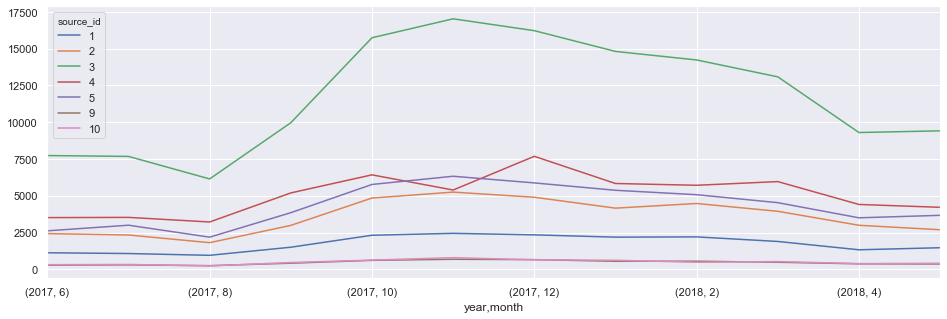

In [61]:
fig, ax = plt.subplots(figsize = (16,5))
costs.pivot_table(index = ['year', 'month'], columns = 'source_id', \
                  values = 'costs', aggfunc = 'sum')\
     .plot(kind = 'line', ax = ax)

На графике более отчетливо видно, что затраты на 3-й источник существенно превышают все остальные.
Посчитаем затраты на привлечение одного покупателя из каждого источника

In [62]:
purchases['first_visit_date'] = purchases['first_visit_date'].astype('datetime64[D]')
purchases = pd.merge(purchases, costs, how = 'left', left_on = ['first_visit_date', 'source_id'],\
                     right_on = ['dt', 'source_id'])

(8.0, 0.0)

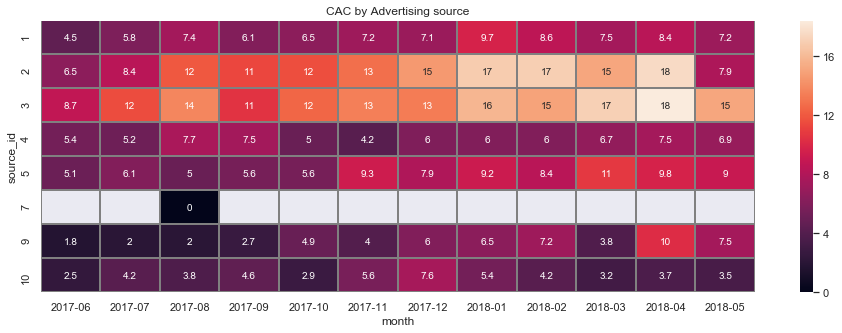

In [63]:
cac = purchases.pivot_table(index = ['source_id', 'first_visit_date'], values = ['costs', 'uid'], \
                      aggfunc = {'costs': 'mean', 'uid':'nunique'})\
                .reset_index()
cac['month'] = cac['first_visit_date'].dt.strftime('%Y-%m')
cac_month = cac.pivot_table(index = ['source_id', 'month'], values = ['costs', 'uid'], \
                      aggfunc = 'sum')\
                .reset_index()
cac_month['cac'] = cac_month['costs'] / cac_month['uid']
cac_pivot = cac_month.pivot_table(index = 'source_id', columns = 'month', values = 'cac', \
                      aggfunc = 'mean')
plt.figure(figsize=(16, 5))
plt.title('CAC by Advertising source')
ax = sns.heatmap(cac_pivot, annot=True, linewidths=1, linecolor='gray')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Итак, самые затратные источники рекламы в расчете на одного пользователя - 3-й и 2-й.

Теперь посчитаем ROMI.

In [64]:
romi = pd.merge(ltv_users_month, cac_month, left_on = 'first_purchase_month', right_on = 'month')
romi['romi'] = romi['ltv'] / romi['cac']


In [65]:
output = romi.pivot_table(index='source_id', columns='month', values='romi', aggfunc='mean')
output.cumsum(axis=1).round(2)

month,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05
source_id,,,,,,,,,,,,
1,0.22,0.35,0.46,0.71,0.83,0.96,1.14,1.24,1.37,1.61,1.92,2.57
2,0.15,0.24,0.31,0.45,0.51,0.58,0.67,0.73,0.80,0.92,1.07,1.65
3,0.11,0.18,0.24,0.38,0.45,0.51,0.61,0.67,0.75,0.86,1.00,1.30
4,0.18,0.33,0.44,0.64,0.80,1.01,1.23,1.39,1.58,1.85,2.20,2.87
5,0.19,0.32,0.49,0.76,0.90,1.00,1.16,1.27,1.40,1.57,1.84,2.35
7,NaN,NaN,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.56,0.93,1.35,1.90,2.06,2.29,2.50,2.65,2.81,3.29,3.54,4.16
10,0.40,0.58,0.80,1.13,1.40,1.57,1.74,1.92,2.19,2.76,3.46,4.79


Получаем, что на окупаемость затрат на привлечение пользователей из 1, 4 и 5-ого рекламных источников уходит 5-6 месяцев. Пользователи, пришедшие из 2 и 3-его источников, окупают затраты на их привлечение в течение почти года. 9 и 10-й источники окупаются за 3-4 месяца, но из предыдущего анализа мы знаем, что процент пользователей, пришедших по ним очень невелик.

 ### 3. Выводы и рекоменданции  

Итак, по результатам анализа получаем следущую картину. В разрезе платформ: пользователей, использующих сайт на стационарных компьютерах больше, они больше денег тратят на одну покупку. При этом пользователи десктопов гораздо больше пользуются сайтом в будние дни по сравнению с выходными.
Но в целом, коэффицент удержания пользователей невелик, а также увеличение притока посетителей благодаря различным рекламным источникам не привело к существенному увеличению конверсии в покупки за рассматриваемый период.
С точки зрения количества покупок лидируют 3 и 4-й рекламные источники, однако средний чек выше у пользователей, пришедших из 1 и 2-ого рекламных источников. Эти же источники, а также 5-й показывают LTV на 6-й месяц выше среднего. Затраты на привлечение одного пользователя наиболее высоки во 2 и 3-ем источниках рекламы. В результате, окупаемость инвестиций в рекламу происходит через полгода для 1, 4 и 5ого рекламных источников, и только через год - для 2 и 3-его источников. С учетом этих данных, перспективным кажется вложение денег в 1-й рекламный источник, а также более детальное изучение 2-ого и 5-ого источников - они также могут являтся точками роста продаж, однако, с учетом более высоких затрат на привлечение одного пользователя по этим источниками, потенциал может быть ограничен. 9 и 10-й источники кажутся очень быстро окупаемыми, но процент пользователей, пришедшим по ним невелик - возможно стоит уделить внимание росту потока посетителей по ним.